In [0]:
%matplotlib inline
import matplotlib.pyplot as plt 
import gzip, os
import numpy as np
from scipy.stats import multivariate_normal

from urllib.request import urlretrieve

In [0]:
# Function that downloads a specified MNIST data file from Yann Le Cun's website
def download(filename, source='http://yann.lecun.com/exdb/mnist/'):
    print("Downloading %s" % filename)
    urlretrieve(source + filename, filename)

# Invokes download() if necessary, then reads in images
def load_mnist_images(filename):
    if not os.path.exists(filename):
        download(filename)
    with gzip.open(filename, 'rb') as f:
        data = np.frombuffer(f.read(), np.uint8, offset=16)
    data = data.reshape(-1,784)
    return data

def load_mnist_labels(filename):
    if not os.path.exists(filename):
        download(filename)
    with gzip.open(filename, 'rb') as f:
        data = np.frombuffer(f.read(), np.uint8, offset=8)
    return data

In [7]:
## Load the training set
train_data = load_mnist_images('train-images-idx3-ubyte.gz')
train_labels = load_mnist_labels('train-labels-idx1-ubyte.gz')

## Load the testing set
test_data = load_mnist_images('t10k-images-idx3-ubyte.gz')
test_labels = load_mnist_labels('t10k-labels-idx1-ubyte.gz')

In [0]:
def displaychar(image):
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.axis('off')
    plt.show()

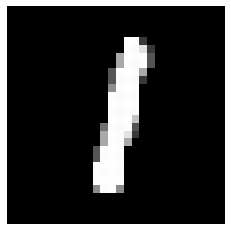

In [9]:
displaychar(train_data[211])

In [10]:
train_data.shape, train_labels.shape

((60000, 784), (60000,))

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(train_data, train_labels, test_size=0.20, random_state=42)

In [12]:
X_train.shape, X_val.shape, Y_train.shape, Y_val.shape

((48000, 784), (12000, 784), (48000,), (12000,))

In [0]:
#i made those two functions in a previous attempt but they were too slow

def compute_mean(x,indices,feature):
  mean = 0
  count = 0
  index = 0
  for i in range (len(indices)):
    if indices[i]:
      mean += x[index,feature]
      count = count + 1
    index = index + 1

  return mean / count

def compute_double_mean(x,indices,feature_1,feature_2):
  mean = 0
  count = 0
  index = 0
  for i in range (len(indices)):
    if indices[i]:
      mean += x[index,feature_1] * x[index,feature_2]
      count = count + 1
    index = index + 1

  return mean / count

In [0]:
def fit_generative_model(x,y):
    ### UPDATE CODE HERE ###
    c = 100000000000
    k = 10  # labels 0,1,...,k-1
    d = (x.shape)[1]  # number of features
    i = np.identity(d)
    mu = np.zeros((k,d))
    sigma = np.zeros((k,d,d))
    pi = np.zeros(k)
    for label in range(0,k):
        indices = (y == label)
        ### START CODE HERE ###
        sample = x[indices,:]
        for i in range(d):
            mu[label,i] = np.mean(sample[:,i])

        for i in range(d):
              for j in range(d):
                sigma[label,i,j] = np.mean(np.dot(sample[:,i], sample[:,j])) - np.dot(mu[label,i],mu[label,j])
        ### Update Code for regularization (smoothing)
        sigma[label] = sigma[label] + c * i
        pi[label] = np.sum(indices) / len(y)
        ### END CODE HERE ###
    return mu, sigma, pi

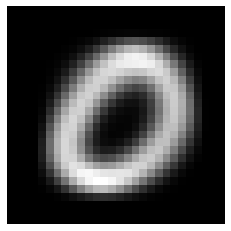

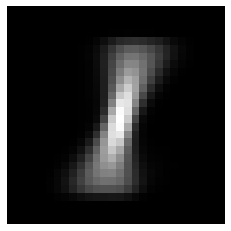

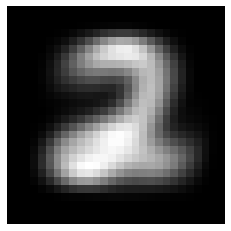

In [77]:
mu, sigma, pi = fit_generative_model(X_train, Y_train)
displaychar(mu[0])
displaychar(mu[1])
displaychar(mu[2])

In [0]:
k = 10
score = np.zeros((Y_val.shape[0],k))
for label in range(0,k):
    for i in range(0,Y_val.shape[0]): 
       score[i,label] = multivariate_normal.logpdf(X_val[i],mu[label],sigma[label],True) * pi[label] 

for j in range(Y_val.shape[0]):
  predictions[j] = np.argmax(score[j,])

# Finally, tally up score
errors = np.sum(predictions != Y_val)
print ("Your model makes " + str(errors) + " errors out of 12000")
print("Accuracy = " + str((12000-errors)/12000*100))

In [28]:
k = 10
score = np.zeros((test_labels.shape[0],k))
for label in range(0,k):
    for i in range(0,test_labels.shape[0]):
       score[i,label] = multivariate_normal.logpdf(test_data[i],mu[label],sigma[label]) * pi[label] 

for j in range(Y_val.shape[0]):
  predictions[j] = np.argmax(score[j,])

# Finally, tally up score
errors = np.sum(predictions != test_labels)
total_count = test_labels.shape[0]
print ("Your model makes " + str(errors) + " errors out of " + str(total_count))
print("Accuracy = " + str((total_count-errors)/total_count*100))

ValueError: ignored